In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

In [16]:
docking_3W9H = pd.read_csv("docking_3W9H.csv")
docking_5ENR = pd.read_csv("docking_5ENR.csv")
docking_5ENT = pd.read_csv("docking_5ENT.csv")
docking_5ENT.head()

,Title,glide gscore,RMSD
0,decoy,-9.165,8.333
1,decoy,-8.634,7.621
2,decoy,-8.559,8.204
3,decoy,-8.451,7.657
4,decoy,-8.436,11.160


In [63]:
#5ENR
activity_table = docking_5ENR.assign(activity=lambda docking_5ENR: (docking_5ENR['Title'] == 'decoy').map({True: "decoy", False: "active"}))
#generating actives and scores for 
ligands = activity_table[activity_table['activity'] == 'active']
actives = list(ligands['Title'])
scores = list(activity_table['Title'])

In [64]:
#5ENT
activity_table_5ENT = docking_5ENT.assign(activity=lambda docking_5ENT: (docking_5ENT['Title'] == 'decoy').map({True: "decoy", False: "active"}))
#generating actives and scores for 
ligands_5ENT = activity_table_5ENT[activity_table_5ENT['activity'] == 'active']
actives_5ENT = list(ligands_5ENT['Title'])
scores_5ENT= list(activity_table_5ENT['Title'])
activity_table_5ENT

,Title,glide gscore,RMSD,activity
0,decoy,-9.165,8.333,decoy
1,decoy,-8.634,7.621,decoy
2,decoy,-8.559,8.204,decoy
3,decoy,-8.451,7.657,decoy
4,decoy,-8.436,11.160,decoy
...,...,...,...,...
4156,decoy,-1.818,6.749,decoy
4157,decoy,-2.422,6.593,decoy
4158,decoy,-3.404,6.571,decoy
4159,decoy,-0.744,6.398,decoy


In [65]:
#3W9H
activity_table_3W9H= docking_3W9H.assign(activity=lambda docking_3W9H: (docking_3W9H['Title'] == 'decoy').map({True: "decoy", False: "active"}))
#generating actives and scores for 
ligands_3W9H = activity_table_3W9H[activity_table_3W9H['activity'] == 'active']
actives_3W9H = list(ligands_3W9H['Title'])
scores_3W9H= list(activity_table_3W9H['Title'])

In [6]:
def get_rates(actives, scores):
    """
    :type actives: list[sting]
    :type scores: list[tuple(string, float)]
    :rtype: tuple(list[float], list[float])
    """

    tpr = [0.0]  # true positive rate
    fpr = [0.0]  # false positive rate
    nractives = len(activity_table[activity_table['activity'] == 'a'])
    nrdecoys = len(activity_table[activity_table['activity'] == 'd'])

    foundactives = 0.0
    founddecoys = 0.0
    for x in scores:
        if x in actives:
            foundactives =  foundactives + 1.0
        else:
            founddecoys += 1.0

        tpr.append(foundactives / float(nractives))
        fpr.append(founddecoys / float(nrdecoys))

    return tpr, fpr

In [7]:
tpr_3W9H, fpr_3W9H = get_rates(actives_3W9H, scores_3W9H)
tpr_5ENT, fpr_5ENT = get_rates(actives_5ENT, scores_5ENT)
tpr_5ENR, fpr_5ENR = get_rates(actives, scores)

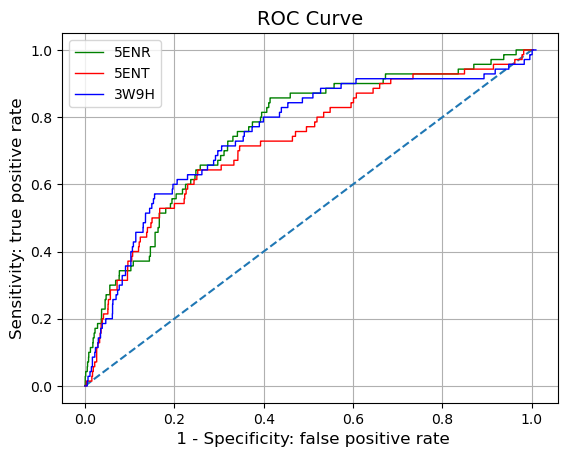

In [8]:
plt.xlabel(" 1 - Specificity: false positive rate", fontsize=12)
plt.ylabel("Sensitivity: true positive rate", fontsize=12)
plt.title("ROC Curve", fontsize=14)
plt.grid(True)
plt.plot([0, 1], ls="--")
tpr_3W9H, fpr_3W9H = get_rates(actives_3W9H, scores_3W9H)
tpr_5ENT, fpr_5ENT = get_rates(actives_5ENT, scores_5ENT)
tpr, fpr = get_rates(actives, scores)
plt.plot(fpr, tpr, color='g', linewidth=1, linestyle='-', label='5ENR')
plt.plot(fpr_5ENT, tpr_5ENT, color='r', linewidth=1, linestyle='-', label='5ENT')
plt.plot(fpr_3W9H, tpr_3W9H, color='b', linewidth=1, linestyle='-', label='3W9H')
plt.legend()

In [9]:
from sklearn import metrics

In [10]:
print('AUK 5ENR: ', metrics.auc(fpr, tpr))
print('AUK 5ENT: ', metrics.auc(fpr_5ENT, tpr_5ENT))
print('AUK 3W9H: ', metrics.auc(fpr_3W9H, tpr_3W9H))

AUK 5ENR:  0.7554924839693051
AUK 5ENT:  0.7269420792599601
AUK 3W9H:  0.7581800343389746


NEW TABLE (results visualisation)

Text(0.5, 0, ' ')

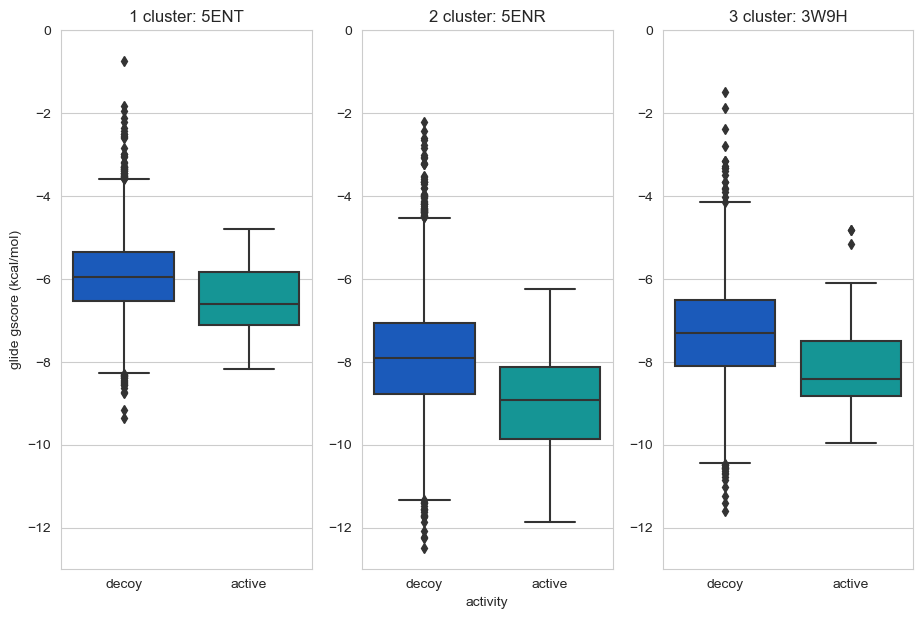

In [125]:
fig, axes = plt.subplots(1,3, figsize = (11, 7))
sns.boxplot (x='activity',y='glide gscore',data=activity_table_5ENT,palette='winter', ax = axes[0])
sns.boxplot (x='activity',y='glide gscore',data=activity_table,palette='winter', ax = axes[1])
sns.boxplot (x='activity',y='glide gscore',data=activity_table_3W9H,palette='winter', ax = axes[2])
axes[0].set_ylim([-13, 0])
axes[0].set_title('1 cluster: 5ENT')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('glide gscore (kcal/mol)')
axes[1].set_ylim([-13, 0])
axes[1].set_title('2 cluster: 5ENR')
axes[1].set_ylabel(' ')
axes[1].set_xlabel('activity')
axes[2].set_ylim([-13, 0])
axes[2].set_title('3 cluster: 3W9H')
axes[2].set_ylabel(' ')
axes[2].set_xlabel(' ')

Text(0.5, 0, ' ')

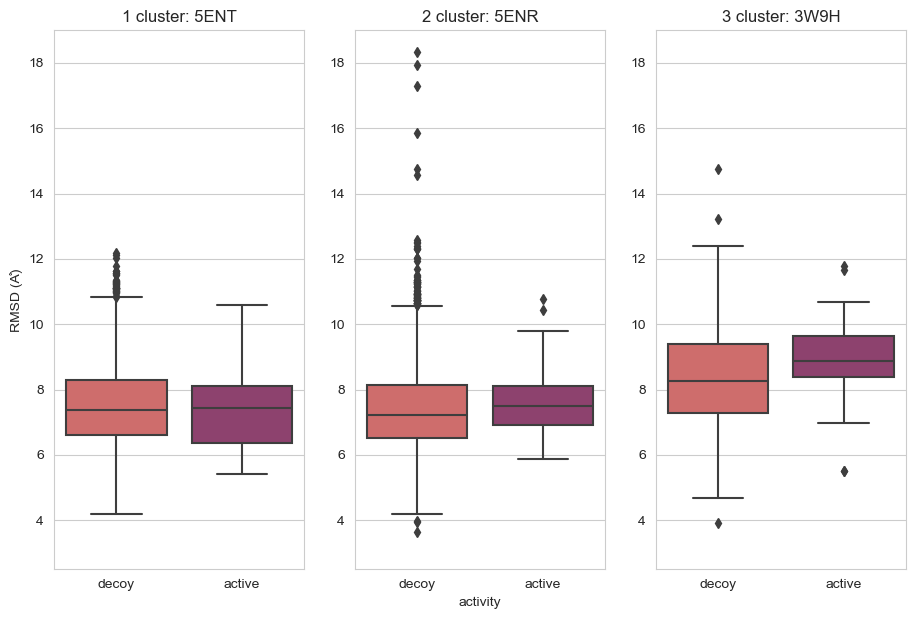

In [128]:
fig, axes = plt.subplots(1,3, figsize = (11, 7))
sns.boxplot (x='activity',y='RMSD',data=activity_table_5ENT,palette='flare', ax = axes[0])
sns.boxplot (x='activity',y='RMSD',data=activity_table,palette='flare', ax = axes[1])
sns.boxplot (x='activity',y='RMSD',data=activity_table_3W9H,palette='flare', ax = axes[2])
axes[0].set_ylim([2.5, 19])
axes[0].set_title('1 cluster: 5ENT')
axes[0].set_xlabel(' ')
axes[0].set_ylabel('RMSD (Å)')
axes[1].set_ylim([2.5, 19])
axes[1].set_title('2 cluster: 5ENR')
axes[1].set_ylabel(' ')
axes[1].set_xlabel('activity')
axes[2].set_ylim([2.5, 19])
axes[2].set_title('3 cluster: 3W9H')
axes[2].set_ylabel(' ')
axes[2].set_xlabel(' ')